### Test: Distribution of our generated queries of "how well do they match the vehicle information"

Using ChatGPT - we generated batches of queries searching for cars that more or less match the scraped vehicle information.

All of those queries were appended with a score from 1 to 10 indicating "how well do they match the vehicle information".  
Those scores were once more auto-generated using ChatGPT.

This notebook will evaluate the distributions of the scores, as we don't want to end up with 'skewed' train/val/test datasets at the end when deciding on the examples we want to use from our generated queries. (So we won't use all of them, but filter them.)

Step 1: Define functions

In [ ]:
import zipfile
import json
import matplotlib.pyplot as plt
from collections import Counter

def load_query_scores_from_zip(zip_path, prefix="questions_part", suffix=".json"):
    """Load all query match scores from a zip archive."""
    score_counter = Counter()
    total_queries = 0
    total_links = 0  # Count total number of vehicle links across all queries

    with zipfile.ZipFile(zip_path, 'r') as zipf:
        for file_name in zipf.namelist():
            if file_name.startswith(prefix) and file_name.endswith(suffix):
                with zipf.open(file_name) as f:
                    data = json.load(f)
                    for query, results in data.items():
                        total_queries += 1
                        total_links += len(results)
                        for _, score in results.items():
                            if isinstance(score, int) and 1 <= score <= 10:
                                score_counter[score] += 1

    return score_counter, total_queries, total_links

def plot_score_distribution(score_counts, title="Distribution of Match Scores (1-10)"):
    """Plot a bar chart of score frequencies from 1 to 10."""
    scores = list(range(1, 11))
    counts = [score_counts.get(score, 0) for score in scores]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(scores, counts, color='skyblue', edgecolor='black')

    # Add value labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + max(counts) * 0.01, f'{yval:,}',
                 ha='center', va='bottom', fontsize=10)

    # Styling
    plt.title(title, fontsize=16)
    plt.xlabel('Score', fontsize=12)
    plt.ylabel('Total Occurrences', fontsize=12)
    plt.xticks(scores)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

def plot_score_pie_chart(score_counts, title="Relative Frequency of Match Scores (1–10)"):
    """Plot a pie chart with rainbow colors and a legend for relative score frequencies."""
    # Prepare data
    scores = list(range(1, 11))
    counts = [score_counts.get(score, 0) for score in scores]
    total = sum(counts)

    if total == 0:
        print("No score data to plot.")
        return

    percentages = [(count / total) * 100 for count in counts]
    labels = [f"Score {score}" for score in scores]
    explode = [0.01] * 10  # Slight separation between slices

    # Colors
    cmap = plt.get_cmap("tab10")
    colors = [cmap(i) for i in range(10)]

    # Plot
    plt.figure(figsize=(8, 8))
    wedges, texts, autotexts = plt.pie(
        counts,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        explode=explode,
        textprops={'color': 'white', 'weight': 'bold'},
    )

    # Add legend
    plt.legend(wedges, labels, title="Scores", loc="center left", bbox_to_anchor=(1, 0.5))
    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()

Step 2: Run functions for a distinct batch


Total queries analyzed: 1000
Total vehicle links (matches): 2,499,000

Score frequencies (total, average per query, and percentage of total scores):
Score 1: 547,265 total — average 547.26 per query — 21.90%
Score 2: 0 total — average 0.00 per query — 0.00%
Score 3: 480,464 total — average 480.46 per query — 19.23%
Score 4: 300,445 total — average 300.44 per query — 12.02%
Score 5: 203,101 total — average 203.10 per query — 8.13%
Score 6: 326,554 total — average 326.55 per query — 13.07%
Score 7: 207,762 total — average 207.76 per query — 8.31%
Score 8: 237,658 total — average 237.66 per query — 9.51%
Score 9: 0 total — average 0.00 per query — 0.00%
Score 10: 195,751 total — average 195.75 per query — 7.83%

--- Sanity Checks ---
Sum of averages across scores: 2499.00 (expected ≈ 2499)
Total score entries: 2,499,000 (expected = 2,499,000)


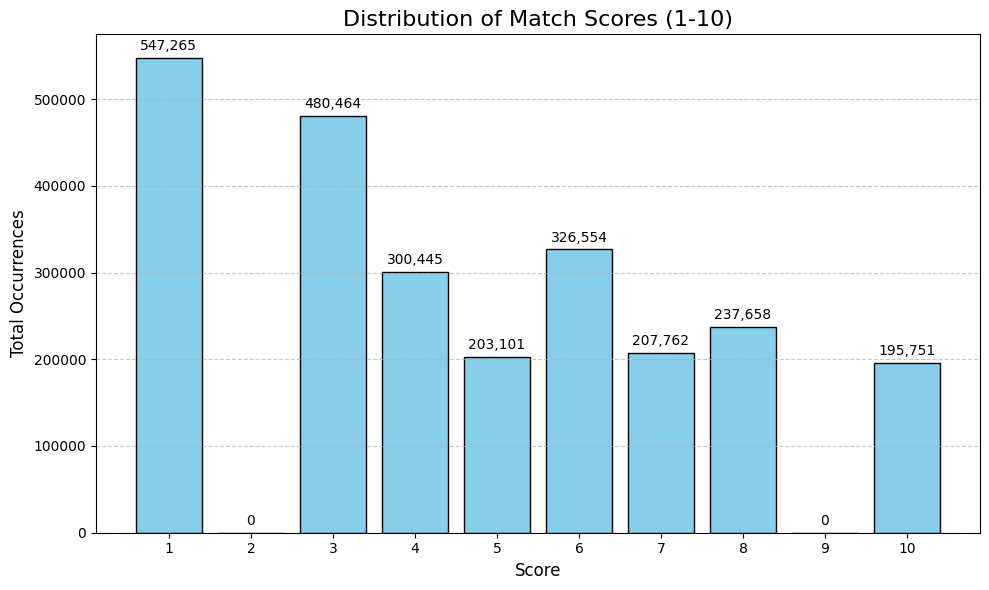

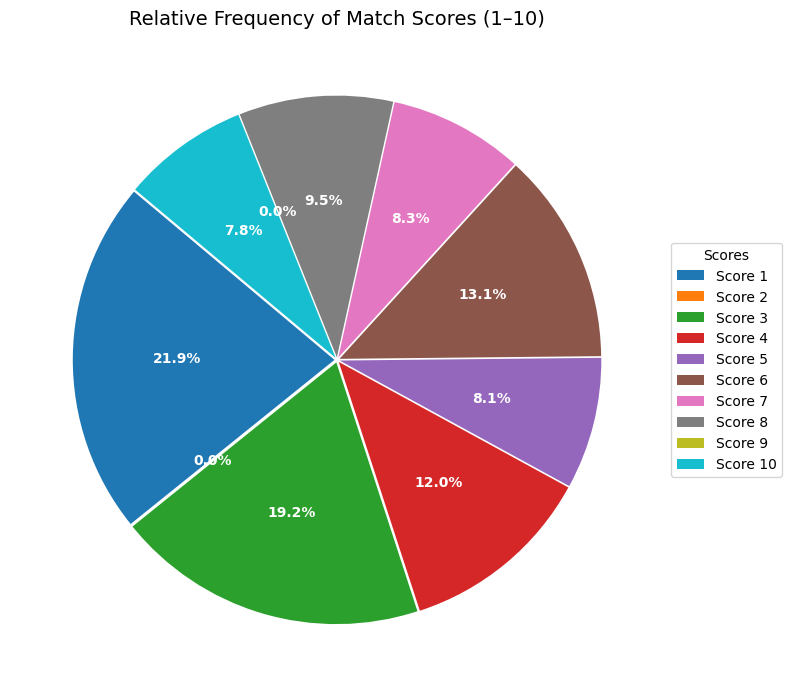

In [ ]:
# Path to an example batch file
zip_path = '../../data/car_match_questions_batch1.zip'
# zip_path = '../../data/questions/first/car_match_questions_batch2.zip' # not included on gitlab

score_counts, total_queries, total_links = load_query_scores_from_zip(zip_path)

print(f"\nTotal queries analyzed: {total_queries}")
print(f"Total vehicle links (matches): {total_links:,}\n")

# Print score frequencies, averages per query, and percentages
print("Score frequencies (total, average per query, and percentage of total scores):")
average_sum = 0
total_score_entries = sum(score_counts.values())

for score in range(1, 11):
    count = score_counts.get(score, 0)
    avg_per_query = count / total_queries if total_queries else 0
    percentage = (count / total_score_entries) * 100 if total_score_entries else 0
    average_sum += avg_per_query
    print(f"Score {score}: {count:,} total — average {avg_per_query:.2f} per query — {percentage:.2f}%")

# Sanity checks
print("\n--- Sanity Checks ---")
print(f"Sum of averages across scores: {average_sum:.2f} (expected ≈ 2499)")
print(f"Total score entries: {sum(score_counts.values()):,} (expected = {total_links:,})")

# Plot
plot_score_distribution(score_counts)
plot_score_pie_chart(score_counts)